In [2]:
!wget https://raw.githubusercontent.com/feat7/thermal-screening/master/data/original.png

--2021-05-24 19:56:51--  https://raw.githubusercontent.com/feat7/thermal-screening/master/data/original.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168355 (164K) [image/png]
Saving to: ‘original.png.2’

original.png.2      100%[===================>] 164.41K  --.-KB/s    in 0.05s   

2021-05-24 19:56:51 (3.24 MB/s) - ‘original.png.2’ saved [168355/168355]



In [3]:
#Final commit from machine in local
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
def read_image(image_path):
    image = cv2.imread(image_path)
    return cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    

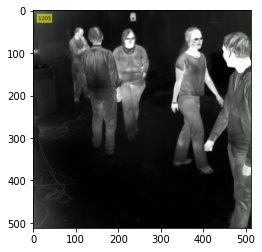

In [6]:
image = read_image("original.png")
plt.imshow(image)

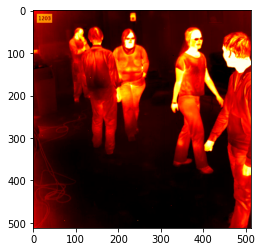

In [7]:
heatmap_gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
heatmap = cv2.applyColorMap(heatmap_gray, cv2.COLORMAP_HOT)
heatmap = cv2.cvtColor(heatmap, cv2.COLOR_BGR2RGB)
plt.imshow(heatmap)

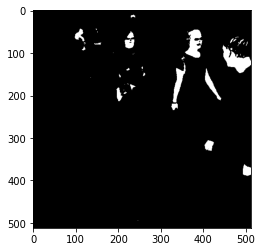

In [19]:
heatmap_gray = cv2.cvtColor(heatmap,cv2.COLOR_RGB2GRAY)
ret,binary_thresh = cv2.threshold(heatmap_gray,200,250,cv2.THRESH_BINARY)
plt.imshow(binary_thresh,cmap='gray')

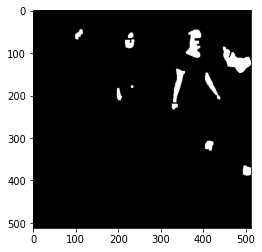

In [38]:
kernel = np.ones((5,5),np.uint8)
image_erode = cv2.erode(binary_thresh,kernel,iterations=1)
image_opening = cv2.dilate(image_erode,kernel,iterations=1)

#image_dilate = cv2.dilate(binary_thresh,kernel,iterations=1)
#image_closing = cv2.erode(image_dilate,kernel, iterations=1)
plt.imshow(image_opening,cmap='gray')

(232.23206106870228, 0.0, 0.0, 0.0)


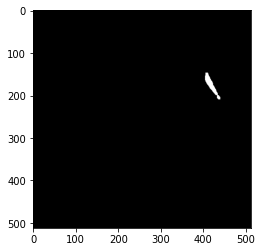

In [59]:
contours, _= cv2.findContours(image_opening,1,2)

contour = contours[5]
mask = np.zeros_like(heatmap_gray)
x,y,w,h = cv2.boundingRect(contour)
mask[y:y+h, x:x+w] = image_opening[y:y+h, x:x+w]
print(cv2.mean(heatmap_gray,mask=mask))
plt.imshow(mask, cmap='gray')

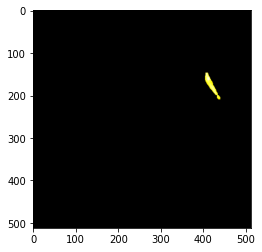

In [61]:
masked = cv2.bitwise_and(heatmap,heatmap, mask=mask)
plt.imshow(masked)

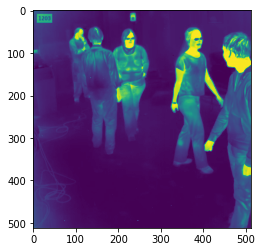

In [62]:
plt.imshow(heatmap_gray)

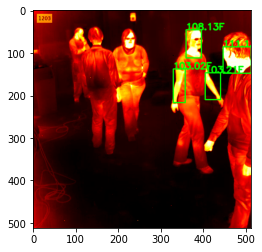

In [79]:
image_with_rectangles = np.copy(heatmap)

for contour in contours:
    #draw rectangle over each contour
    x,y,w,h = cv2.boundingRect(contour)

    if (w*h) < 600:
        continue 

    #Mask is boolean type of matrix
    mask = np.zeros_like(heatmap_gray)
    mask[y:y+h,x:x+w] = image_opening[y:y+h,x:x+w]

    #Finding temperature
    temp = round(cv2.mean(heatmap_gray,mask=mask)[0]/ 2.25, 2)

    image_with_rectangles = cv2.rectangle(
            image_with_rectangles,(x,y),(x+w,y+h),(0,255,0),2)

    #Write temperature for each rectangle
    cv2.putText(image_with_rectangles, f"{temp}F",(x,y),
                cv2.FONT_HERSHEY_SIMPLEX,0.7,(0,255,0),2,cv2.LINE_AA)

plt.imshow(image_with_rectangles)

